<a href="https://colab.research.google.com/github/mnJ00/Data/blob/main/%EC%99%80%EC%9D%B8_%ED%92%88%EC%A7%88_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
##한글 폰트 인식

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (12.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [57]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [59]:
# 파이썬 warning 무시
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트를 사용하기 위한 코드

plt.rc("font", family="NanumBarunGothic")

In [60]:
train['quality'].value_counts().sort_index()

4     108
5    1069
6    1418
7     539
8      97
Name: quality, dtype: int64

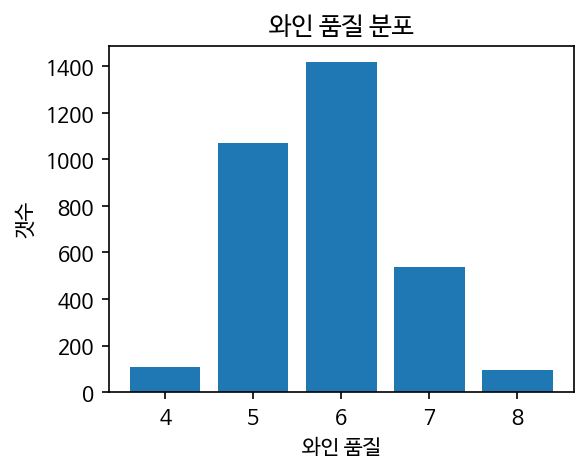

In [5]:
## 품질라벨 시각화

x = train['quality'].value_counts().sort_index().index
y = train['quality'].value_counts().sort_index().values

plt.figure(figsize=(4,3), dpi=150)

plt.title('와인 품질 분포')
plt.xlabel('와인 품질')
plt.ylabel('갯수')

plt.bar(x,y)
plt.show()

In [61]:
# 범주형 변수 변환

train['type'] = train['type'].apply(lambda x: 0 if x=='white' else 1)
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.18,0.37,1.30,0.040,15.0,96.0,0.99120,3.06,0.61,12.1,0,6
1,2,7.5,0.38,0.29,4.90,0.021,38.0,113.0,0.99026,3.08,0.48,13.0,0,7
2,3,6.1,0.27,0.33,2.20,0.021,26.0,117.0,0.98860,3.12,0.30,12.5,0,6
3,4,6.4,0.32,0.50,10.70,0.047,57.0,206.0,0.99680,3.08,0.60,9.4,0,5
4,5,8.4,0.37,0.43,2.30,0.063,12.0,19.0,0.99550,3.17,0.81,11.2,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.16,0.31,5.30,0.043,42.0,157.0,0.99455,3.35,0.47,10.5,0,5
3227,3228,6.4,0.18,0.28,17.05,0.047,53.0,139.0,0.99724,3.25,0.35,10.5,0,6
3228,3229,6.0,0.28,0.25,1.80,0.042,8.0,108.0,0.99290,3.08,0.55,9.0,0,5
3229,3230,7.7,0.28,0.29,6.90,0.041,29.0,163.0,0.99520,3.44,0.60,10.5,0,6


In [62]:
## 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train[train.columns[2:-1]])
train[train.columns[2:-1]] = scaler.transform(train[train.columns[2:-1]])
train

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,1,8.0,0.104167,0.222892,0.010736,0.046745,0.107692,0.266272,0.078851,0.263566,0.221591,0.569231,0.0,6
1,2,7.5,0.312500,0.174699,0.065951,0.015025,0.284615,0.316568,0.060729,0.279070,0.147727,0.707692,0.0,7
2,3,6.1,0.197917,0.198795,0.024540,0.015025,0.192308,0.328402,0.028726,0.310078,0.045455,0.630769,0.0,6
3,4,6.4,0.250000,0.301205,0.154908,0.058431,0.430769,0.591716,0.186813,0.279070,0.215909,0.153846,0.0,5
4,5,8.4,0.302083,0.259036,0.026074,0.085142,0.084615,0.038462,0.161751,0.348837,0.335227,0.430769,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,6.4,0.083333,0.186747,0.072086,0.051753,0.315385,0.446746,0.143436,0.488372,0.142045,0.323077,0.0,5
3227,3228,6.4,0.104167,0.168675,0.252301,0.058431,0.400000,0.393491,0.195296,0.410853,0.073864,0.323077,0.0,6
3228,3229,6.0,0.208333,0.150602,0.018405,0.050083,0.053846,0.301775,0.111625,0.279070,0.187500,0.092308,0.0,5
3229,3230,7.7,0.208333,0.174699,0.096626,0.048414,0.215385,0.464497,0.155967,0.558140,0.215909,0.323077,0.0,6


In [63]:
## test 데이터 전처리
scaler.fit(test[test.columns[2:-1]])
test['type'] = test['type'].apply(lambda x : 0 if x == 'white' else 1)
test[test.columns[2:-1]] = scaler.transform(test[test.columns[2:-1]])
test

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1,7.3,0.184,0.203252,0.192557,0.038270,0.210909,0.444444,0.229176,0.125984,0.068571,0.516667,0
1,2,8.7,0.496,0.195122,0.058252,0.361065,0.029091,0.030303,0.516616,0.456693,0.200000,0.166667,1
2,3,6.9,0.440,0.008130,0.055016,0.111481,0.094545,0.111111,0.349158,0.472441,0.160000,0.466667,1
3,4,6.3,0.120,0.406504,0.313916,0.056572,0.436364,0.424242,0.357790,0.094488,0.120000,0.183333,0
4,5,6.9,0.368,0.032520,0.074434,0.113145,0.043636,0.070707,0.499353,0.748031,0.377143,0.233333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3226,3227,7.1,0.192,0.195122,0.401294,0.068220,0.370909,0.666667,0.469141,0.283465,0.137143,0.133333,0
3227,3228,5.6,0.160,0.325203,0.174757,0.041597,0.254545,0.377104,0.186016,0.370079,0.102857,0.683333,0
3228,3229,7.3,0.184,0.560976,0.307443,0.053245,0.414545,0.518519,0.456193,0.251969,0.114286,0.100000,0
3229,3230,5.2,0.208,0.300813,0.177994,0.036606,0.298182,0.427609,0.156668,0.401575,0.091429,0.750000,0


In [66]:
features = train.columns[2:]

X = train[features]
y = train['quality']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, shuffle=False)

#데이터 shape 확인
print(f"X_train.shape : {X_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"X_valid.shape : {X_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

X_train.shape : (2907, 12)
y_train.shape : (2907,)
X_valid.shape : (324, 12)
y_valid.shape : (324,)


In [68]:
## 랜덤포레스트 모델

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
predict = model.predict(X_valid)
print(predict[:10])

[7 6 5 6 5 7 6 6 6 5]


In [69]:
## 평가

import numpy as np

def ACC(y_true, pred):
    score = np.mean(y_true==pred)
    return score

acc = ACC(y_valid, predict)

print(f"모델의 정확도는 {acc*100:.2f}%입니다.")

모델의 정확도는 99.07%입니다.


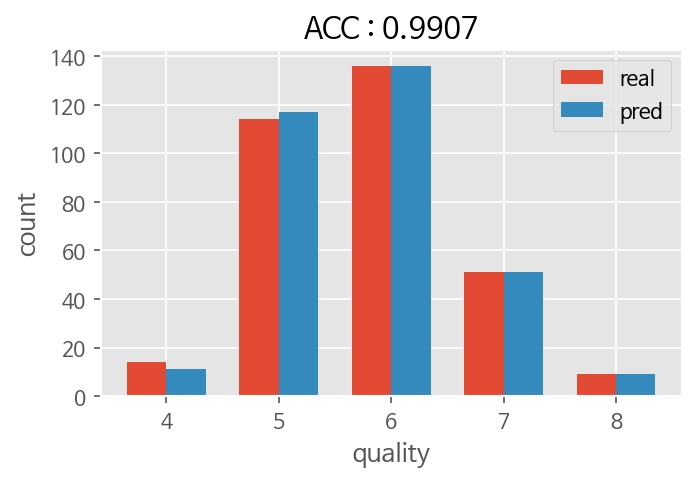

In [70]:
## 모델 검증 시각화

import numpy as np

##### 모델 검증 시각화 #####
def make_plot(y_true, pred):

    acc = ACC(y_true, pred)
    df_validation = pd.DataFrame({'y_true':y_true, 'y_pred':pred})

    # 검증 데이터 정답지('y_true') 빈도수 (sorted)
    df_validation_count = pd.DataFrame(df_validation['y_true'].value_counts().sort_index())
    # 검증 데이터 예측치('y_pred') 빈도수 (sorted)
    df_pred_count =  pd.DataFrame(df_validation['y_pred'].value_counts().sort_index())

    # pd.concat - 검증 데이타 정답지, 예측치 빈도수 합치기
    df_val_pred_count = pd.concat([df_validation_count,df_pred_count], axis=1).fillna(0)

    ############################################################
    # 그래프 그리기
    ############################################################

    x = df_validation_count.index
    y_true_count = df_val_pred_count['y_true']
    y_pred_count = df_val_pred_count['y_pred']

    width = 0.35
    plt.figure(figsize=(5,3),dpi=150)

    plt.title('ACC : ' + str(acc)[:6])
    plt.xlabel('quality')
    plt.ylabel('count')

    p1 = plt.bar([idx-width/2 for idx in x], y_true_count, width, label='real')
    p2 = plt.bar([idx+width/2 for idx in x], y_pred_count,  width, label='pred')

    plt.legend()
    plt.show()

make_plot(y_valid, predict)

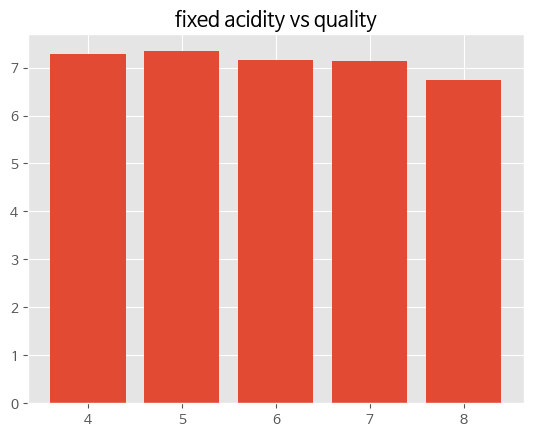

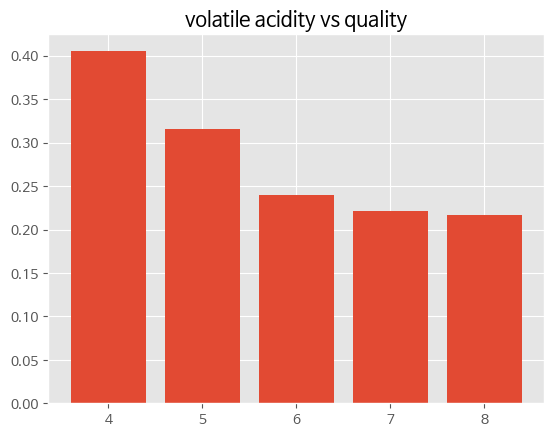

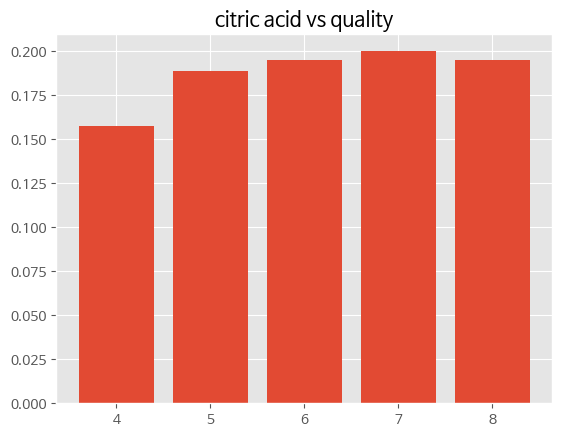

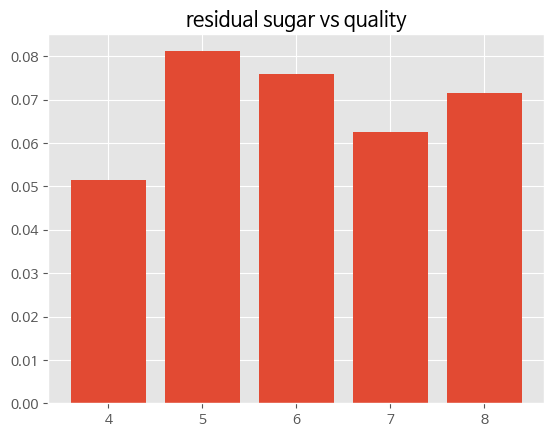

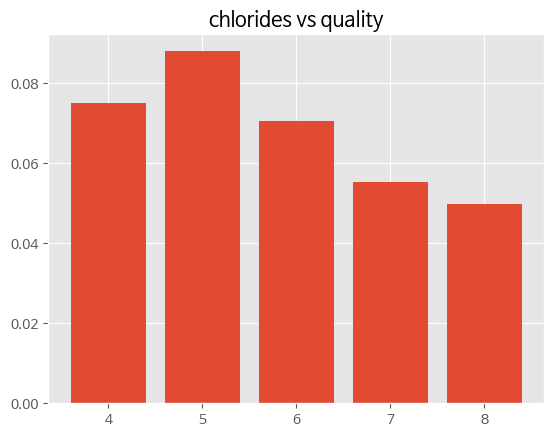

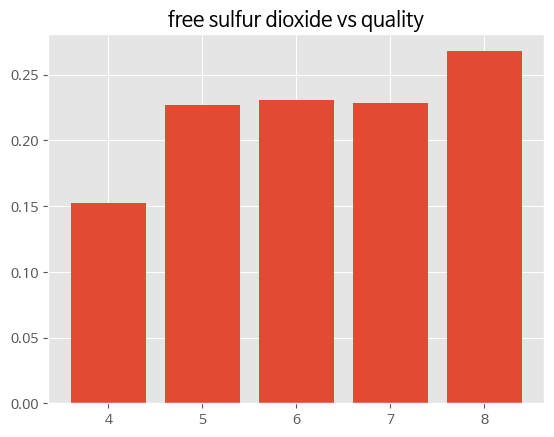

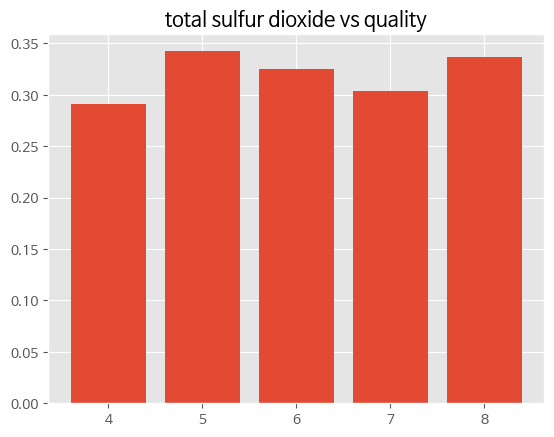

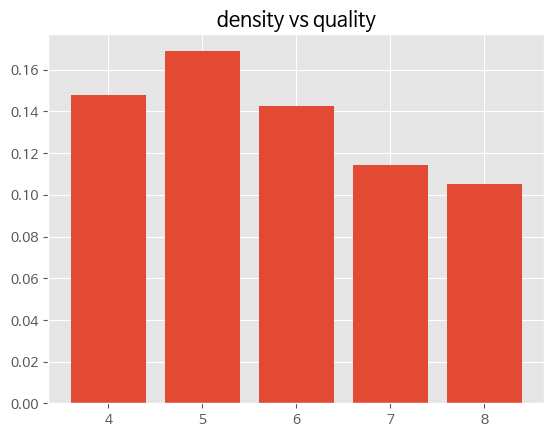

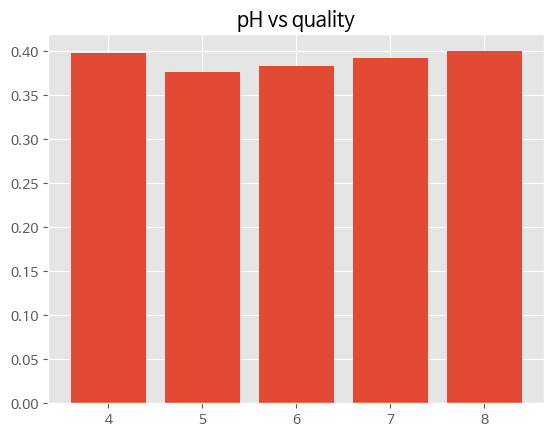

In [71]:

## 퀄리티에 따른 피쳐 비교

def make_plots(text:str):
    plt.title(text + ' vs quality')

    x = train.groupby('quality').mean().reset_index()['quality']
    y = train.groupby('quality').mean().reset_index()[text]

    plt.bar(x,y)
    plt.show()

for col in train.groupby('quality').mean().reset_index().columns[2:-3]:
    make_plots(col)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


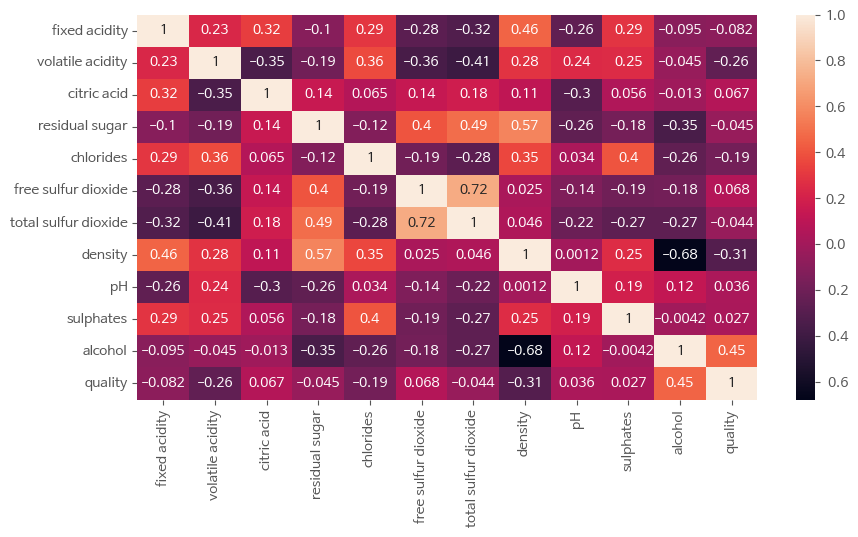

In [38]:
## 변수간 상관관계
import seaborn as sns

features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type']

plt.figure(figsize=(10,5))
ax = sns.heatmap(train[list(features) + ['quality']].corr(), annot=True)
plt.show()

In [72]:
## 와인 종류별 데이터 개수

white = train[train['type'] == 0]
red = train[train['type'] == 1]

print('화이트 와인 데이터 개수 : ', white.shape[0])
print('레드와인 와인 데이터 개수 : ', red.shape[0])

화이트 와인 데이터 개수 :  2453
레드와인 와인 데이터 개수 :  778


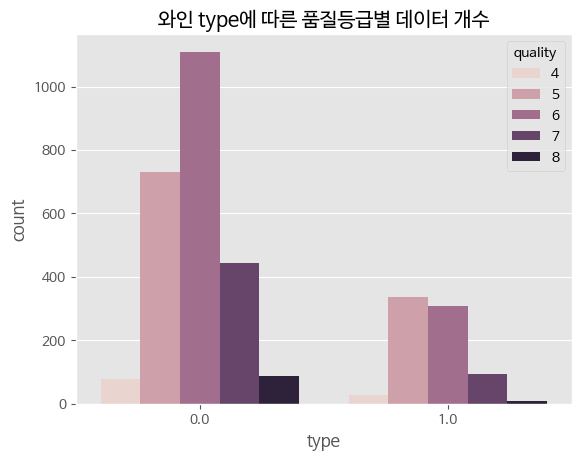

In [73]:
## 와인 종류에 따른 품질 분포 시각화

plt.style.use("ggplot")

sns.countplot(data=train, x='type', hue='quality')
plt.title("와인 type에 따른 품질등급별 데이터 개수")
plt.show()

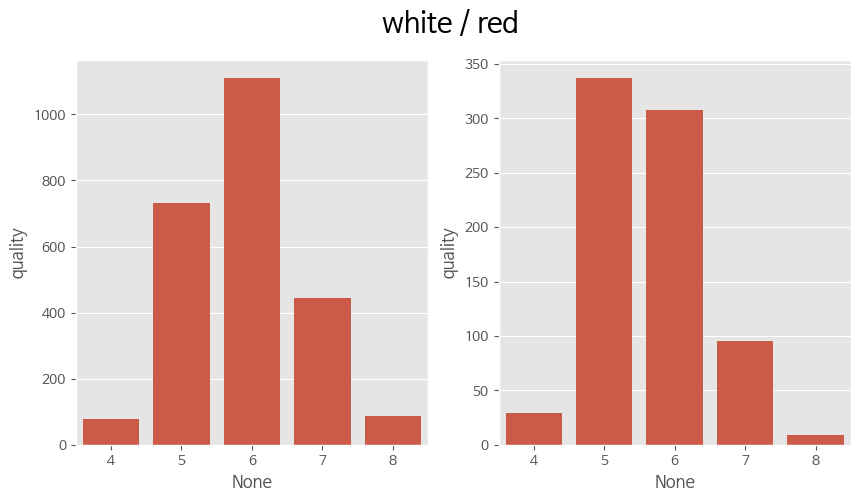

In [74]:
plt.style.use("ggplot")

plt.figure(figsize=(10,5))
plt.suptitle("white / red", fontsize=20)

## white
plt.subplot(1,2,1)
sns.barplot(x = white['quality'].value_counts().index, y = white['quality'].value_counts())

## red
plt.subplot(1,2,2)
sns.barplot(x = red['quality'].value_counts().index, y = red['quality'].value_counts())
plt.show()

In [75]:
## 다중 공산성 발생 변수 해결

total_count = sum(train['total sulfur dioxide'] > train['free sulfur dioxide'])
same_count =  sum(train['total sulfur dioxide'] == train['free sulfur dioxide'])
sulfur_count = sum(train['total sulfur dioxide'] < train['free sulfur dioxide'])

print('total > free에 해당하는 개수 :', total_count)
print('두 변수가 같은 경우의 개수 :', same_count)
print('total < free에 해당하는 개수 :', sulfur_count)

total > free에 해당하는 개수 : 2518
두 변수가 같은 경우의 개수 : 3
total < free에 해당하는 개수 : 710


In [76]:
# 파생변수 생성 및 불필요 변수 제거

train['free et sulfur dioxid'] = train['total sulfur dioxide'] - train['free sulfur dioxide']
test['free et sulfur dioxid'] = test['total sulfur dioxide'] - test['free sulfur dioxide']

train = train.drop('total sulfur dioxide', axis = 1)
test = test.drop('total sulfur dioxide', axis = 1)

In [77]:
## 정규화

from sklearn.preprocessing import MinMaxScaler

features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'free et sulfur dioxid', 'density', 'pH', 'sulphates', 'alcohol']

scaler = MinMaxScaler()
scaler.fit(train[features])
train[features] = scaler.transform(train[features])
test[features] = scaler.transform(test[features])

In [78]:
features = train.columns[2:]

X = train[features]
y = train['quality']

In [84]:
## RandomForestClassifier의 최적 하이퍼파라미터 탐색 및 전체 데이터 학습
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {'n_estimators' : [100, 150, 200],
          'criterion' : ['gini', 'entropy']}

rf_total = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, cv=2, return_train_score=True, verbose=3)

rf_total.fit(X,y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 1/2] END criterion=gini, n_estimators=100;, score=(train=1.000, test=0.996) total time=   0.7s
[CV 2/2] END criterion=gini, n_estimators=100;, score=(train=1.000, test=0.998) total time=   0.6s
[CV 1/2] END criterion=gini, n_estimators=150;, score=(train=1.000, test=0.996) total time=   0.8s
[CV 2/2] END criterion=gini, n_estimators=150;, score=(train=1.000, test=0.997) total time=   0.8s
[CV 1/2] END criterion=gini, n_estimators=200;, score=(train=1.000, test=0.995) total time=   0.8s
[CV 2/2] END criterion=gini, n_estimators=200;, score=(train=1.000, test=0.998) total time=   0.7s
[CV 1/2] END criterion=entropy, n_estimators=100;, score=(train=1.000, test=0.996) total time=   0.4s
[CV 2/2] END criterion=entropy, n_estimators=100;, score=(train=1.000, test=0.990) total time=   0.4s
[CV 1/2] END criterion=entropy, n_estimators=150;, score=(train=1.000, test=0.994) total time=   0.6s
[CV 2/2] END criterion=entropy, n_estima

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200]},
             return_train_score=True, verbose=3)

In [85]:
## 최적 성능 & 하이퍼파라미터 출력
total_score = rf_total.best_score_
total_params = rf_total.best_params_

print("최적 성능 : ",total_score)
print("최적 하이퍼파라미터 : ",total_params)

최적 성능 :  0.9965957683229624
최적 하이퍼파라미터 :  {'criterion': 'gini', 'n_estimators': 100}


In [87]:
##앙상블에 활용될 RandomForest, GradientBoosting, ExtraTrees 분류기 모델

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

models = []

rfc = RandomForestClassifier(random_state=42)
models.append(rfc)

gbc = GradientBoostingClassifier(random_state=42)
models.append(gbc)

etc = ExtraTreesClassifier(random_state=42)
models.append(etc)

In [88]:
## 앙상블 모델 파라미터 최적화를 위한 GridSearchCV 설정

params = [] # 모델들의 파라미터들을 할당할 리스트를 만들어 줍니다

params_rfc = {'n_estimators' : [100, 120,140]} # params 리스트에 성능을 비교하고자 하는 파라미터들을 선언합니다
params.append(params_rfc) # 파라미터들을 리스트에 저장합니다

params_gbc = {'learning_rate':[0.05,0.1,0.15],
             'n_estimators':[60,100,140]}
params.append(params_gbc)

params_etc = {'n_estimators' : [50,100,150]}
params.append(params_etc)

params

[{'n_estimators': [100, 120, 140]},
 {'learning_rate': [0.05, 0.1, 0.15], 'n_estimators': [60, 100, 140]},
 {'n_estimators': [50, 100, 150]}]

In [89]:
## 앙상블 모델의 파라미터 최적화를 통한 모델 선택

best_models={}

for i, model in enumerate(models):
    model = GridSearchCV(model, param_grid=params[i], cv=2, return_train_score=True, verbose=3)

    model.fit(X,y)

    best_models[i] = model.best_estimator_

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END n_estimators=100;, score=(train=1.000, test=0.996) total time=   1.2s
[CV 2/2] END n_estimators=100;, score=(train=1.000, test=0.998) total time=   1.4s
[CV 1/2] END n_estimators=120;, score=(train=1.000, test=0.995) total time=   0.9s
[CV 2/2] END n_estimators=120;, score=(train=1.000, test=0.997) total time=   0.7s
[CV 1/2] END n_estimators=140;, score=(train=1.000, test=0.995) total time=   0.5s
[CV 2/2] END n_estimators=140;, score=(train=1.000, test=0.996) total time=   0.5s
Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END learning_rate=0.05, n_estimators=60;, score=(train=1.000, test=1.000) total time=   1.2s
[CV 2/2] END learning_rate=0.05, n_estimators=60;, score=(train=1.000, test=1.000) total time=   1.2s
[CV 1/2] END learning_rate=0.05, n_estimators=100;, score=(train=1.000, test=1.000) total time=   2.5s
[CV 2/2] END learning_rate=0.05, n_estimators=100;, score=(train=1.000, test

In [90]:
## 각 모델의 최적 파라미터

best_models

{0: RandomForestClassifier(random_state=42),
 1: GradientBoostingClassifier(learning_rate=0.05, n_estimators=60, random_state=42),
 2: ExtraTreesClassifier(random_state=42)}

In [91]:
##.sklearn을 이용한 Hard Voting 앙상블 분류기의 학습

from sklearn.ensemble import VotingClassifier #앙상블 기법을 위한 패키지를 불러옵니다.

estimators = [
    ('rfc', best_models[0]),
    ('gbc', best_models[1]),
    ('etc', best_models[2])
]

model = VotingClassifier(estimators=estimators, voting='hard') #앙상블 모델을 선언합니다. 디폴트값 Hard Voting Classifier
model.fit(X, y) #모델을 학습시킵니다

VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=60,
                                                         random_state=42)),
                             ('etc', ExtraTreesClassifier(random_state=42))])

In [92]:
## sklearn을 이용한 Soft Voting 앙상블 분류기의 학습
from sklearn.ensemble import VotingClassifier

estimators = [
    ('rfc', best_models[0]),
    ('gbc', best_models[1]),
    ('etc', best_models[2])
]

model = VotingClassifier(estimators=estimators, voting='soft')
model.fit(X, y)


VotingClassifier(estimators=[('rfc', RandomForestClassifier(random_state=42)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         n_estimators=60,
                                                         random_state=42)),
                             ('etc', ExtraTreesClassifier(random_state=42))],
                 voting='soft')

In [ ]:
## submission 파일에 값 채우기

submission['quality'] = pd.DataFrame(model.predict(test[features]))
submission.head(10)
submission.to_csv('submission.csv', index=False)